# Failed Banks ML Project

## Econ 1680: MLTA and Econ

#### Name: Lena Kim

Research Question: Given a failed bank’s balance sheet metrics, how can we predict
whether it is acquired by a national bank, a regional bank, or not acquired at all? Which
metrics contribute the most weight to this decision?

IMPORTANT: This notebook focuses on Principal Component Analysis to perform dimension reduction on our large dataset in order to answer the classification problem posed above. I will import code from the preliminary/overarching notebook ML_BASES with the "run" method.


In [1]:
#econ1680MLProject
%run ML_BASES.ipynb

Standardize data so variables are comparable with each other


In [5]:

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_imputed)

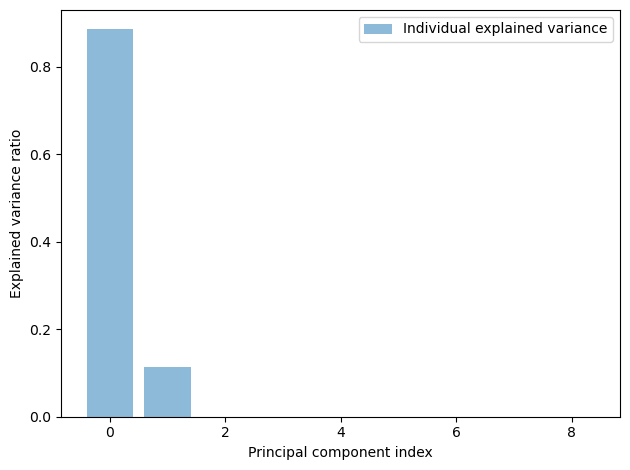

In [6]:
# pca = PCA()
# X_pca = pca.fit_transform(X)
exp_var_pca = pca.explained_variance_ratio_
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Largest variance is total unpaid other claimants

In [8]:
X.var()

Cash and Investments                  3.515085e+08
Due from FDIC Corp and Receivables    1.450217e+02
Assets in Liquidation                 2.003928e+06
Total Assets                          3.602195e+08
Administrative Liabilities            7.975990e+06
Total Unpaid Other Claimants          1.739786e+12
Uninsured Deposit Claims              7.138292e+07
General Creditor                      7.248301e+10
Total Liabilities                     2.964138e+12
dtype: float64

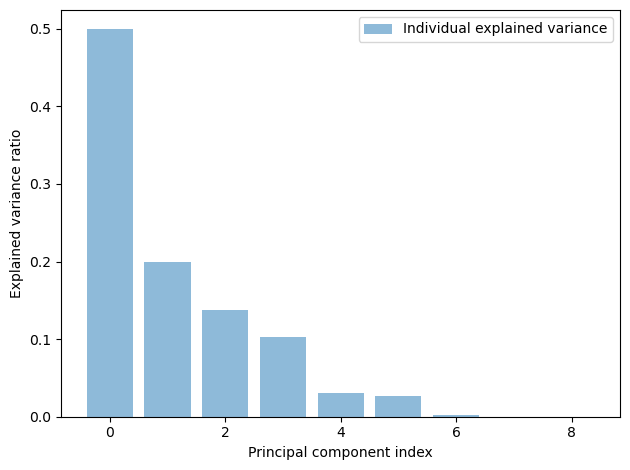

In [10]:
scaler = StandardScaler()
scaler.fit(X_imputed)
X_sc = scaler.transform(X_imputed)
X_sc_pca = pca.fit_transform(X_sc)
exp_var_sc_pca = pca.explained_variance_ratio_
plt.bar(range(0,len(exp_var_sc_pca)), exp_var_sc_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Clustering